In [3]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
os.listdir('rockpaperscissors-raw')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [5]:
os.listdir('rockpaperscissors-raw/rps-cv-images')

['paper',
 'README_rpc-cv-images.txt',
 'rock',
 'scissors',
 'train',
 'validation']

In [6]:
len_files_awal_total = len([name for name in os.listdir('rockpaperscissors-raw/paper')]) + len([name for name in os.listdir('rockpaperscissors-raw/rock')]) + len([name for name in os.listdir('rockpaperscissors-raw/scissors')])
print(len_files_awal_total)

2188


In [7]:
len_files_dua_total = len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/paper')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/rock')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/scissors')])
print(len_files_dua_total)

0


In [107]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset
base_dir = 'rockpaperscissors-raw/rps-cv-images'

# Directories for train and validation sets
train_dir = 'rockpaperscissors-raw/rps-cv-images/train'
validation_dir = 'rockpaperscissors-raw/rps-cv-images/validation'

# Categories
categories = ['rock', 'paper', 'scissors']

# # Create train and validation directories
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(validation_dir, exist_ok=True)

# for category in categories:
#     # Create subdirectories for each category
#     os.makedirs(os.path.join(train_dir, category), exist_ok=True)
#     os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

#     # List all files in the category
#     category_path = os.path.join(base_dir, category)
#     files = os.listdir(category_path)

#     # Split files into train and validation
#     train_files, validation_files = train_test_split(files, test_size=0.4, random_state=42)

#     # Move files to train directory
#     for file in train_files:
#         shutil.move(os.path.join(category_path, file), os.path.join(train_dir, category, file))

#     # Move files to validation directory
#     for file in validation_files:
#         shutil.move(os.path.join(category_path, file), os.path.join(validation_dir, category, file))


# len_train = len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/train/rock')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/train/paper')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/train/scissors')])
# len_validation = len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/validation/rock')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/validation/paper')]) + len([name for name in os.listdir('rockpaperscissors-raw/rps-cv-images/validation/scissors')])
# print("Data has been split into train and validation sets.\n")
# print(f"Total data in training set: {len_train}")
# print(f"Total data in validation set: {len_validation}")


In [9]:
os.listdir(train_dir)

['paper', 'rock', 'scissors']

In [10]:
# check compositions in training set
train_dir = 'rockpaperscissors-raw/rps-cv-images/train'

# Categories
categories = ['rock', 'paper', 'scissors']

# Function to count files in a directory
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Count total files in train directory
total_files = 0
for category in categories:
    category_path = os.path.join(train_dir, category)
    num_files = count_files(category_path)
    total_files += num_files
    print(f"Number of files in {category_path}: {num_files}")

print(f"\nTotal number of files in train directory: {total_files}")

Number of files in rockpaperscissors-raw/rps-cv-images/train\rock: 435
Number of files in rockpaperscissors-raw/rps-cv-images/train\paper: 427
Number of files in rockpaperscissors-raw/rps-cv-images/train\scissors: 450

Total number of files in train directory: 1312


In [11]:
os.listdir(validation_dir)

['paper', 'rock', 'scissors']

In [12]:
# check compositions in validation set
total_files = 0
for category in categories:
    category_path = os.path.join(validation_dir, category)
    num_files = count_files(category_path)
    total_files += num_files
    print(f"Number of files in {category_path}: {num_files}")

print(f"\nTotal number of files in validation directory: {total_files}")

Number of files in rockpaperscissors-raw/rps-cv-images/validation\rock: 291
Number of files in rockpaperscissors-raw/rps-cv-images/validation\paper: 285
Number of files in rockpaperscissors-raw/rps-cv-images/validation\scissors: 300

Total number of files in validation directory: 876


### Image Augmentation

Run to all classes directory

In [36]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define directories
# Directory with original images
input_dir = 'rockpaperscissors-raw/rps-cv-images/validation/rock'
# Directory to save augmented images
output_dir = 'rockpaperscissors-augmented/validation/rock'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define ImageDataGenerator with augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

for image_file in image_files:
    # Load image
    img_path = os.path.join(input_dir, image_file)
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 

    aug_iter = train_datagen.flow(img_array, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='png')

    for i in range(1):
        _ = next(aug_iter) 

## Modelling NONE

In [37]:
train_dir = "rockpaperscissors-augmented/train"
validation_dir = "rockpaperscissors-augmented/validation"

# Only rescaling, no augmentations
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

# Create the validation_generator (same process for validation)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

Found 1285 images belonging to 3 classes.
Found 864 images belonging to 3 classes.


### Modeling

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 128)     

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_none.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

In [42]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 14s 123ms/step - loss: 1.1029 - accuracy: 0.3275 - val_loss: 1.0969 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 12s 118ms/step - loss: 1.0651 - accuracy: 0.4075 - val_loss: 0.6723 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 11s 110ms/step - loss: 0.7159 - accuracy: 0.6700 - val_loss: 0.7056 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 11s 114ms/step - loss: 0.4240 - accuracy: 0.8338 - val_loss: 1.0844 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 11s 113ms/step - loss: 0.3629 - accuracy: 0.8825 - val_loss: 0.1898 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 12s 117ms/step - loss: 0.2627 - accuracy: 0.9275 - val_loss: 0.2639 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

In [43]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

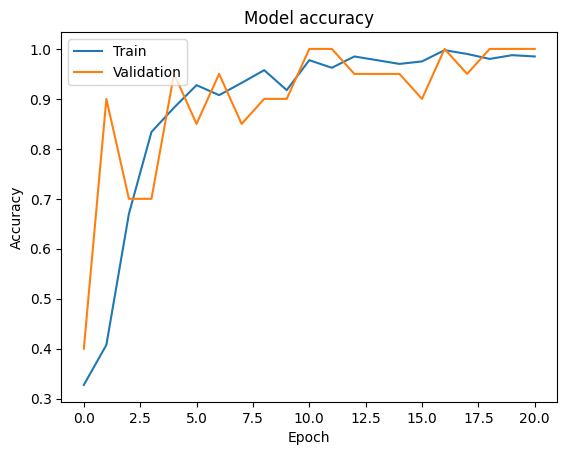

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model_none.keras')

# Evaluate the model to see the best validation accuracy
val_loss, val_accuracy = best_model.evaluate(validation_generator)
print(f"Best model validation accuracy: {val_accuracy:.4f}")

216/216 [==============================] - 5s 21ms/step - loss: 0.1437 - accuracy: 0.9502
Best model validation accuracy: 0.9502


## Modelling CANNY

### Image Preprocessing
Run to all classes directory

In [53]:
import os
import numpy as np
import cv2  # OpenCV for Canny edge detection
from tensorflow.keras.preprocessing.image import load_img, img_to_array

input_dir = 'rockpaperscissors-augmented/train/paper'
output_dir = 'rockpaperscissors-canny/train/paper'

os.makedirs(output_dir, exist_ok=True)

def apply_canny_edge_detection(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 64, 128)
    return edges


# Process each image in the input directory
image_files = [f for f in os.listdir(
    input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

for image_file in image_files:
    img_path = os.path.join(input_dir, image_file)

    edges = apply_canny_edge_detection(img_path)

    output_image_path = os.path.join(output_dir, f"edges_{image_file}")

    cv2.imwrite(output_image_path, edges)


In [97]:
train_dir = "rockpaperscissors-canny/train"
validation_dir = "rockpaperscissors-canny/validation"

# Only rescaling, no augmentations
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

# Create the validation_generator (same process for validation)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

Found 1285 images belonging to 3 classes.
Found 864 images belonging to 3 classes.


### Modeling

In [98]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 128)     

In [100]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_canny.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

In [102]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 12s 110ms/step - loss: 1.1056 - accuracy: 0.3450 - val_loss: 1.0930 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 11s 112ms/step - loss: 1.0827 - accuracy: 0.3804 - val_loss: 1.0488 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 11s 108ms/step - loss: 0.8895 - accuracy: 0.5000 - val_loss: 0.6186 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 11s 112ms/step - loss: 0.6522 - accuracy: 0.6625 - val_loss: 1.3196 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 13s 126ms/step - loss: 0.6409 - accuracy: 0.7075 - val_loss: 0.3395 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 12s 118ms/step - loss: 0.5785 - accuracy: 0.7725 - val_loss: 0.2891 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

In [103]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

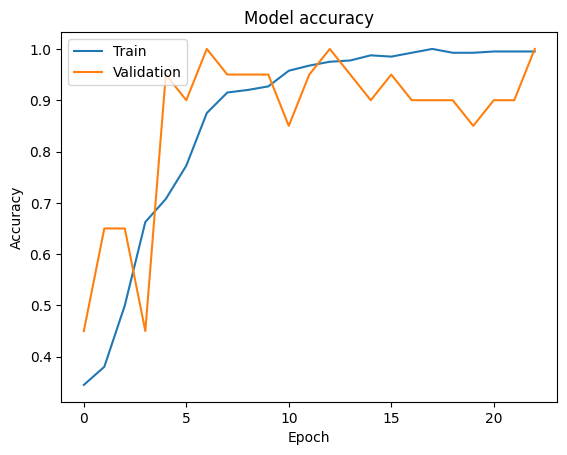

In [104]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [105]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model_canny.keras')

# Evaluate the model to see the best validation accuracy
val_loss, val_accuracy = best_model.evaluate(validation_generator)
print(f"Best model validation accuracy: {val_accuracy:.4f}")

216/216 [==============================] - 5s 23ms/step - loss: 0.4427 - accuracy: 0.8738
Best model validation accuracy: 0.8738


## Modelling PREWIT

### Image Preprocessing
Run to all classes directory

In [70]:
import os
import numpy as np
import cv2  # OpenCV for image manipulation

# Define input and output directories
# Directory with original images
input_dir = 'rockpaperscissors-augmented/validation/paper'
# Directory to save processed images
output_dir = 'rockpaperscissors-prewit/validation/paper'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to apply Prewitt edge detection


def apply_prewitt_edge_detection(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Define Prewitt kernels for edge detection
    kernel_x = np.array([[1, 0, -1],
                         [1, 0, -1],
                         [1, 0, -1]])

    kernel_y = np.array([[1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]])

    # Apply convolution using the Prewitt kernels to detect edges in both x and y directions
    grad_x = cv2.filter2D(gray_img, -1, kernel_x)
    grad_y = cv2.filter2D(gray_img, -1, kernel_y)

    # Convert grad_x and grad_y to float32 before calculating the magnitude
    grad_x = grad_x.astype(np.float32)
    grad_y = grad_y.astype(np.float32)

    # Combine the gradients in x and y direction to get the final edge map
    edges = cv2.magnitude(grad_x, grad_y)

    # Normalize the result to the range [0, 255] and convert to uint8 for saving
    edges = np.uint8(np.clip(edges, 0, 255))

    return edges


# Process each image in the input directory
image_files = [f for f in os.listdir(
    input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

for image_file in image_files:
    img_path = os.path.join(input_dir, image_file)

    # Apply Prewitt edge detection
    edges = apply_prewitt_edge_detection(img_path)

    # Define the output image path
    output_image_path = os.path.join(output_dir, f"edges_{image_file}")

    # Save the edge-detected image to the output directory
    cv2.imwrite(output_image_path, edges)

In [71]:
train_dir = "rockpaperscissors-prewit/train"
validation_dir = "rockpaperscissors-prewit/validation"

# Only rescaling, no augmentations
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

# Create the validation_generator (same process for validation)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

Found 1285 images belonging to 3 classes.
Found 864 images belonging to 3 classes.


### Modeling

In [72]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [74]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_prewit.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

In [76]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 13s 116ms/step - loss: 1.0380 - accuracy: 0.4625 - val_loss: 0.8061 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 11s 115ms/step - loss: 0.6932 - accuracy: 0.7025 - val_loss: 0.6729 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 12s 119ms/step - loss: 0.5164 - accuracy: 0.8075 - val_loss: 0.2784 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 12s 122ms/step - loss: 0.3206 - accuracy: 0.8900 - val_loss: 0.3066 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 11s 111ms/step - loss: 0.3174 - accuracy: 0.9025 - val_loss: 0.1833 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 11s 110ms/step - loss: 0.2788 - accuracy: 0.9050 - val_loss: 0.6099 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

In [77]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

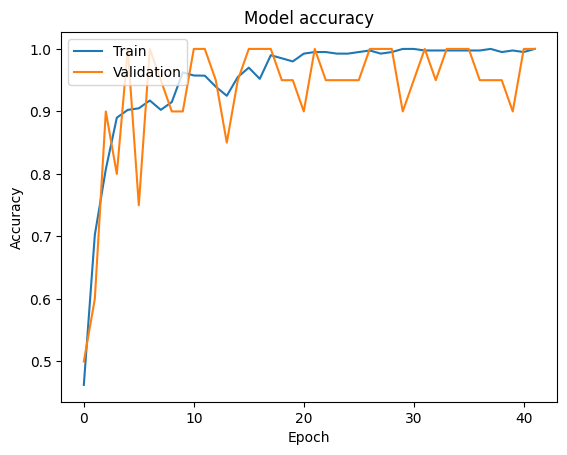

In [78]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model_prewit.keras')

# Evaluate the model to see the best validation accuracy
val_loss, val_accuracy = best_model.evaluate(validation_generator)
print(f"Best model validation accuracy: {val_accuracy:.4f}")

216/216 [==============================] - 6s 27ms/step - loss: 0.2705 - accuracy: 0.9282
Best model validation accuracy: 0.9282


## Modelling SOBEL

### Image Preprocessing
Run to all classes directory

In [86]:
import os
import numpy as np
import cv2  # OpenCV for image manipulation

# Define input and output directories
input_dir = 'rockpaperscissors-augmented/train/paper'  # Directory with original images
output_dir = 'rockpaperscissors-sobel/train/paper'    # Directory to save processed images

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to apply Sobel edge detection
def apply_sobel_edge_detection(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator to compute gradients in both x and y directions
    grad_x = cv2.Sobel(gray_img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)  # Sobel in the x direction
    grad_y = cv2.Sobel(gray_img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)  # Sobel in the y direction

    # Compute the magnitude of the gradients
    edges = cv2.magnitude(grad_x, grad_y)

    # Normalize the result to the range [0, 255] and convert to uint8 for saving
    edges = np.uint8(np.clip(edges, 0, 255))

    return edges

# Process each image in the input directory
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

for image_file in image_files:
    img_path = os.path.join(input_dir, image_file)

    # Apply Sobel edge detection
    edges = apply_sobel_edge_detection(img_path)

    # Define the output image path
    output_image_path = os.path.join(output_dir, f"edges_{image_file}")

    # Save the edge-detected image to the output directory
    cv2.imwrite(output_image_path, edges)

In [87]:
train_dir = "rockpaperscissors-sobel/train"
validation_dir = "rockpaperscissors-sobel/validation"

# Only rescaling, no augmentations
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

# Create the validation_generator (same process for validation)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical'
)

Found 1285 images belonging to 3 classes.
Found 864 images belonging to 3 classes.


### Modeling

In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 17, 17, 128)     

In [90]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_sobel.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

In [93]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 14s 128ms/step - loss: 0.9477 - accuracy: 0.4725 - val_loss: 0.7216 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 13s 131ms/step - loss: 0.7665 - accuracy: 0.6125 - val_loss: 0.6132 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 12s 118ms/step - loss: 0.7126 - accuracy: 0.6650 - val_loss: 0.7140 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 11s 108ms/step - loss: 0.6484 - accuracy: 0.6650 - val_loss: 0.6310 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 11s 109ms/step - loss: 0.6301 - accuracy: 0.6475 - val_loss: 0.4120 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 11s 108ms/step - loss: 0.5633 - accuracy: 0.7225 - val_loss: 0.4956 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 7/50
100/100 [==============================] 

In [94]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

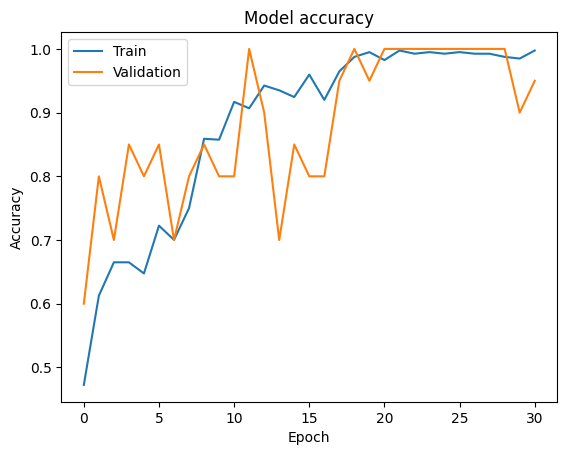

In [95]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [96]:
from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model_sobel.keras')

# Evaluate the model to see the best validation accuracy
val_loss, val_accuracy = best_model.evaluate(validation_generator)
print(f"Best model validation accuracy: {val_accuracy:.4f}")

216/216 [==============================] - 6s 29ms/step - loss: 0.2310 - accuracy: 0.9155
Best model validation accuracy: 0.9155
